# IDEAS:

**DONE**
* cross-validation evaluation (evaluate on changing subsets of the known (x, y)) **DONE**
* stimulate simpleness (prefer shorter chromosomes when sorting) **DONE**
* when domain error, replace the subtree giving the number by randdom constant **DONE**
* display diversity measure **DONE**
* restrict mutation probability (a lot) **BAD**
* implement one node replacement (keeping the subtree under it) **SOMEWHAT**

**TBD**

* implement objective that will benefit functions with correct operations with possibly bad scaling (probably unrealistic)
* island populations (may be too complicated)
---
* implement optimized constant symbols
* implement **A**utomatically **D**efined **F**unctions
* implement max depth into mutation (new subtree depth + dept of the target node <= max depth)

In [1]:
using EO
using Plots

compiled


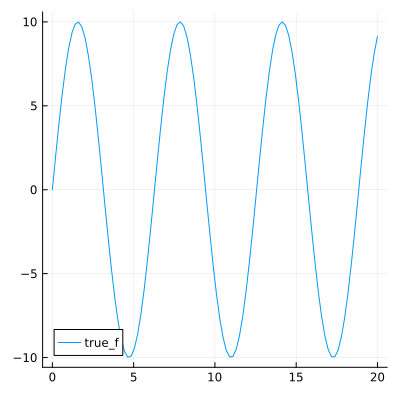

In [2]:
basis_functions = [+, -, *, /, sin, cos]
basis_variables = Vector{Any}([#= 2., 1., 0.,  =#:var1])
# symbols are expected to be supplied as arguments to the trained model (in alphabetical order of the symbols)
# model = EO.Expr_parser(solution.top_coords);
# ŷ = model(var1);

#true_f = x -> x*cos(20*x) + x + 10*sin(x)
#true_f = x -> x^5 - 2*x^3 + x
#true_f = x -> x*cos(x) + x + sin(x)
#true_f = x -> x*cos(20*x) + x + 10*sin(x)
true_f = x -> 10*sin(x)
#true_f = x -> cos(pi*x)

x = collect(LinRange(0., 20., 100))
y = true_f.(x);

plot(x, y, label="true_f", size=(400, 400))

In [3]:
#= pop_size = 1000

objective_function  = enclose_arguments(EO.f_function_diff_squared, x, y)
initialization      = enclose_noargs(EO.expression_initialization, pop_size, objective_function, basis_functions, basis_variables)
#selection           = enclose_arguments(EO.s_tournament, 10, 3)
selection           = enclose_arguments(EO.s_greedy_overselection, pop_size, 0.16)
crossover           = enclose_arguments(EO.cr_subtree, pop_size, basis_functions, basis_variables)
mutation            = enclose_arguments(EO.subtree_mutation!, basis_functions, basis_variables)
replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, pop_size*20)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)

yy = EO.Expr_parser(solution.top_coords).(x);
println(yy)
println(y)
println(solution.top_coords) =# 
#model = EO.Expression(solution.top_coords);

### naive

In [4]:
#= pop_size = 300

objective_function  = enclose_arguments(EO.f_function_diff_squared, x, y)
initialization      = enclose_noargs(EO.expression_initialization, pop_size, objective_function, basis_functions, basis_variables)
selection           = enclose_arguments(EO.s_tournament, 100, 3)
crossover           = enclose_arguments(EO.cr_subtree, pop_size, basis_functions, basis_variables)
mutation            = enclose_arguments(EO.subtree_mutation!, basis_functions, basis_variables)
replacement         = enclose_replacement(r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, pop_size*10)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)

model = EO.Expr_parser(solution.top_coords);
println(model.(x))
println(y)
println(solution.top_coords) =#

### dirty shoe

In [14]:
pop_size = 100

objective_function  = enclose_arguments(EO.f_function_diff_squared, x, y)
#objective_function  = enclose_arguments(EO.f_function_diff_derivative, x, y)
#objective_function  = enclose_arguments(EO.f_function_diff_derivative_w, x, y)
#objective_function  = enclose_arguments(EO.f_function_diff_subset, x, y, 0.9)
initialization      = enclose_noargs(EO.expression_initialization, pop_size, objective_function, basis_functions, basis_variables)
selection           = enclose_arguments(EO.s_tournament, 10, 3)
crossover           = enclose_arguments(EO.cr_subtree, pop_size, basis_functions, basis_variables)
mutation            = enclose_arguments(EO.subtree_mutation!, basis_functions, basis_variables)
replacement         = enclose_replacement(EO.r_best_n_diverse, pop_size, 0.3)       # chosen fraction of the population will consist of the best n, the rest is random
termination         = enclose_argument(iteration_termination, pop_size*10)

@time solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination);

model = EO.Expr_parser(solution);
println(model.(x));
println(y);
println(solution);

  1.267091 seconds (18.91 M allocations: 701.544 MiB, 16.57% gc time, 0.84% compilation time)
[7.807798130470158, 8.591086921540745, 8.932389034431337, 9.123483369445601, 9.24564532764208, 9.330474006027888, 9.392814831599473, 9.440563450445815, 9.478306491393841, 9.508890653515566, 9.534176287845163, 9.555430540150972, 9.573546336370752, 9.589171030005375, 9.602785392763973, 9.614753958424028, 9.625358149621569, 9.634818686540994, 9.643311116287066, 9.650976806897798, 9.657930879583617, 9.664268029868678, 9.67006686528608, 9.675393182702031, 9.68030247584527, 9.684841876043613, 9.689051670209633, 9.692966499747495, 9.69661631598078, 9.70002714790052, 9.703221723881349, 9.706219978775856, 9.709039470306315, 9.711695723133513, 9.714202514845756, 9.716572114993095, 9.718815485921304, 9.720942452343115, 9.72296184518071, 9.724881624121561, 9.726708982474278, 9.728450437236734, 9.730111906753677, 9.731698777914056, 9.733215964495855, 9.734667957989688, 9.736058872008595, 9.737392481208863,

### hunger games

In [5]:
pop_size = 1000

objective_function  = enclose_arguments(EO.f_function_diff_squared, x, y)
initialization      = enclose_noargs(EO.expression_initialization, pop_size, objective_function, basis_functions, basis_variables)
selection           = enclose_arguments(EO.s_tournament, 1000, 3)
crossover           = enclose_arguments(EO.cr_subtree, pop_size, basis_functions, basis_variables)
mutation            = enclose_arguments(EO.subtree_mutation!, basis_functions, basis_variables)
replacement         = enclose_replacement(EO.r_tournament, pop_size, 30)
termination         = enclose_argument(iteration_termination, pop_size*10)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)

model = EO.Expr_parser(solution.top_coords);
println(model.(x))
println(y)
println(solution.top_coords)

[13006.141223698003, 13466.86065967259, 11105.09003525814, 12689.544870023417, 13324.954858179171, 11971.853860918316, 5193.2031324770305, Inf, 12031.137605309637, 13719.6415961333, 13375.031439340575, 12118.16364814659, 427483.4908625636, 11637.16873779482, 13415.617342289124, 13597.013025044173, 18223.512060388985, 14654.602413706274, 11569.62288713677, 13424.04853651718, 14363.265740510073, 16286.954437708186, NaN, 13358.16011097154, 13491.373046887633, 14236.166669909326, 3.3790198310026205e6, 34064.16465186034, 12053.596900071167, 11791.86735028008, 11982.147190370351, 4278.053750621729, 13351.465402146716, 13714.38588628336, 1.0873244611362031e8, 1.2313194622191624e6, 17878.079097690355, 10197.075452339966, 12180.894820624246, 12437.994307459128, 13085.5312906261, 3.899627396129169e6, 12103.000382929858, 14012.448513390807, 13174.110821026865, 13401.407241147133, 13730.74597678949, 204901.49655853747, 13463.94650040639, 14850.829140116879, 11680.859352433708, 14624.20703355124, 1

InterruptException: InterruptException:

### geometrcic

In [7]:
pop_size = 1000

objective_function  = enclose_arguments(EO.f_function_diff_squared, x, y)
initialization      = enclose_noargs(EO.expression_initialization, pop_size, objective_function, basis_functions, basis_variables)
selection           = enclose_arguments(EO.s_tournament, 100, 3)
crossover           = enclose_arguments(EO.cr_GSGP, pop_size, basis_functions, basis_variables)
mutation            = enclose_arguments(EO.subtree_mutation!, basis_functions, basis_variables)
replacement         = enclose_replacement(EO.r_best_n_diverse, pop_size, 0.3)       # chosen fraction of the population will consist of the best n, the rest is random
termination         = enclose_argument(iteration_termination, pop_size*10)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)

model = EO.Expr_parser(solution.top_coords);
println(model.(x))
println(y)
println(solution.top_coords)

InterruptException: InterruptException:

### multiobjective

In [8]:
pop_size = 1000

f_complexity(x::EO.ExprChromosome) = x.length

F = typeof(enclose_arguments(EO.f_function_diff_squared, x, y))
objective_function  = EO.MultiObjFunction{F}([enclose_arguments(EO.f_function_diff_squared, x, y), f_complexity])
initialization      = enclose_noargs(EO.expression_initialization, pop_size, objective_function, basis_functions, basis_variables)
selection           = enclose_arguments(EO.s_tournament, 10, 3)
crossover           = enclose_arguments(EO.cr_subtree, pop_size, basis_functions, basis_variables)
mutation            = enclose_arguments(EO.subtree_mutation!, basis_functions, basis_variables)
replacement         = EO.enclose_replacement(EO.r_NSGA, pop_size)
termination         = enclose_argument(iteration_termination, pop_size*10)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)

model = EO.Expr_parser(solution.top_coords);
println(model.(x))
println(y)
println(solution.top_coords)

InterruptException: InterruptException:

In [9]:
println(solution.pop_history[end].fitness)

UndefVarError: UndefVarError: `solution` not defined

In [10]:
#= EO.plot_pareto_fronts(solution.pop_history[end]) =#

In [11]:
t = collect(LinRange(-1., 100., 100))
p = plot(t, model.(t), label="regressed_f", size=(400, 400))
p = plot!(p, t, true_f.(t), label="true_f")

UndefVarError: UndefVarError: `model` not defined

In [12]:
using GraphRecipes
using Plots

plot(solution.top_coords, nodeshape=:circle, nodesize=0.1, size=(500, 500))

In [ ]:

plot(solution.pop_history[end].population[2].sequence, nodeshape=:circle, nodesize=0.1, size=(500, 500))

In [ ]:
t = collect(LinRange(-1., 100., 100))
p = plot(t, EO.Expr_parser(solution.pop_history[end].population[1].sequence).(t), label="regressed_f", size=(400, 400))
p = plot!(p, t, true_f.(t), label="true_f")